In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [9]:
df = pd.read_csv('electricity_rates_zipcodes_2020.csv')

In [10]:
New_York_rates = df.loc[df['state'] == 'NY']

In [11]:
New_York_rates

,zip,eiaid,utility_name,state,service_type,ownership,comm_rate,ind_rate,res_rate
4427,10516,3249,Central Hudson Gas & Elec Corp,NY,Bundled,Investor Owned,0.132296,0.099311,0.175737
4428,12466,3249,Central Hudson Gas & Elec Corp,NY,Bundled,Investor Owned,0.132296,0.099311,0.175737
4429,12076,3249,Central Hudson Gas & Elec Corp,NY,Bundled,Investor Owned,0.132296,0.099311,0.175737
4430,12015,3249,Central Hudson Gas & Elec Corp,NY,Bundled,Investor Owned,0.132296,0.099311,0.175737
4431,12463,3249,Central Hudson Gas & Elec Corp,NY,Bundled,Investor Owned,0.132296,0.099311,0.175737
...,...,...,...,...,...,...,...,...,...
40501,14542,16183,Rochester Gas & Electric Corp,NY,Delivery,Investor Owned,0.052974,0.036541,0.078492
40502,14639,16183,Rochester Gas & Electric Corp,NY,Delivery,Investor Owned,0.052974,0.036541,0.078492
40503,14638,16183,Rochester Gas & Electric Corp,NY,Delivery,Investor Owned,0.052974,0.036541,0.078492
40504,14413,16183,Rochester Gas & Electric Corp,NY,Delivery,Investor Owned,0.052974,0.036541,0.078492


Text(0.5, 0, 'Electricity Rate')

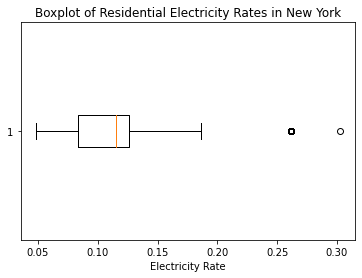

In [12]:
plt.figure()
plt.boxplot(New_York_rates['res_rate'], vert = False)
plt.title('Boxplot of Residential Electricity Rates in New York')
plt.xlabel('Electricity Rate')

In [13]:
df_county_zipcodes = pd.read_csv('New_York_State_ZIP_Codes-County_FIPS_Cross-Reference.csv')

In [14]:
df_county_zipcodes = df_county_zipcodes[['County Name', 'ZIP Code']]

In [15]:
df_county_zipcodes

,County Name,ZIP Code
0,Albany,12007
1,Albany,12009
2,Albany,12023
3,Albany,12041
4,Albany,12045
...,...,...
2538,Yates,14561
2539,Yates,14837
2540,Yates,14842
2541,Yates,14857


In [16]:
new_df = New_York_rates.merge(df_county_zipcodes, how = 'left', left_on = 'zip', right_on = 'ZIP Code')

In [17]:
new_df = new_df.drop('ZIP Code', axis = 1)

In [18]:
grouped_by_county = new_df.groupby('County Name')['res_rate'].mean().rename_axis(['County'])
grouped_by_county.nlargest(30)

County
Suffolk         0.302730
Kings           0.218325
Nassau          0.218325
Bronx           0.218325
New York        0.218325
Queens          0.218325
Richmond        0.218325
Westchester     0.181936
Rockland        0.154417
Orange          0.149541
Ulster          0.135415
Dutchess        0.133252
Putnam          0.129191
Greene          0.128683
Sullivan        0.113328
Albany          0.112158
Columbia        0.107163
Schoharie       0.106289
Fulton          0.104996
Warren          0.104996
Jefferson       0.104996
Lewis           0.104996
St. Lawrence    0.104776
Orleans         0.104695
Oswego          0.104677
Schenectady     0.104469
Montgomery      0.104418
Niagara         0.102903
Monroe          0.102803
Onondaga        0.102474
Name: res_rate, dtype: float64

In [19]:
grouped_by_county.nsmallest(32).sort_values(ascending = False)

County
Oneida         0.102441
Saratoga       0.102140
Herkimer       0.102044
Rensselaer     0.101933
Genesee        0.101889
Franklin       0.101624
Hamilton       0.101163
Washington     0.100843
Erie           0.100630
Livingston     0.100447
Cattaraugus    0.099991
Essex          0.099699
Wayne          0.099657
Ontario        0.099623
Cortland       0.099601
Chautauqua     0.099185
Allegany       0.099111
Cayuga         0.098739
Delaware       0.098515
Wyoming        0.098438
Madison        0.098168
Otsego         0.096690
Clinton        0.095555
Yates          0.095102
Tompkins       0.094880
Chenango       0.094880
Seneca         0.094428
Steuben        0.093347
Schuyler       0.092857
Broome         0.091049
Chemung        0.090204
Tioga          0.090153
Name: res_rate, dtype: float64

In [22]:
grouped_by_county

County
Albany         0.112158
Allegany       0.099111
Bronx          0.218325
Broome         0.091049
Cattaraugus    0.099991
                 ...   
Washington     0.100843
Wayne          0.099657
Westchester    0.181936
Wyoming        0.098438
Yates          0.095102
Name: res_rate, Length: 62, dtype: float64

In [32]:
shapefile_path = 'Counties_Shoreline'
ny_counties = gpd.read_file(shapefile_path)

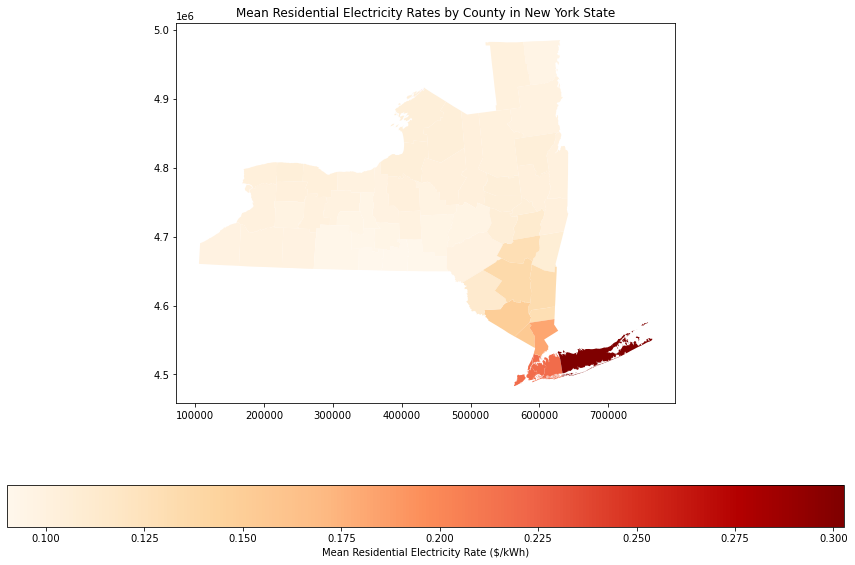

In [33]:
# Merge electricity rates with the geospatial data
ny_counties = ny_counties.merge(grouped_by_county, left_on='NAME', right_on='County', how='left')

# Plotting the heat map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ny_counties.plot(column='res_rate', ax=ax, legend=True, cmap='OrRd', 
                 legend_kwds={'label': "Mean Residential Electricity Rate ($/kWh)",
                              'orientation': "horizontal"})
plt.title('Mean Residential Electricity Rates by County in New York State')
plt.show()